# Text processing

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

There exists several applications that require the processing of text, e.g. machine translation, sentiment analysis, semantic word similarity, part of speech tagging, to name just a few. However, in order to solve those problems, the text needs to be transformed into something that can be understood by the models. In the following some of the basic preprocessing steps that must be applied to text are going to be presented.

Natural Language Toolkit
https://www.nltk.org/index.html

NLTK is a platform for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning.

## Tokenization

This process assigns a unique number to every word (or character) in the dataset. Tokenization requires to set up the maximum number of fatures or words to be included in the tokenizer.  

In [1]:
from __future__ import division
from nltk import word_tokenize 

text = 'ejemplo de texto a ser procesado'
word_tokenize(text)

['ejemplo', 'de', 'texto', 'a', 'ser', 'procesado']

In [12]:
from keras.preprocessing.text import Tokenizer

max_fatures = 8
tokenizer = Tokenizer(num_words=max_fatures, split=' ')
tokenizer.fit_on_texts([text])
X = tokenizer.texts_to_sequences([text])
print[text]
print(X)

['ejemplo de texto a ser procesado']
[[1, 2, 3, 4, 5, 6]]


In [14]:
#Dictionary
tokenizer.word_index

{'a': 4, 'de': 2, 'ejemplo': 1, 'procesado': 6, 'ser': 5, 'texto': 3}

If there are more unique words in the text than **num_words**, only the most frequent ones are given a unique token.

## Depending on the task, it may be necessary to eliminate some words such as prepositions

In [18]:
import nltk
stopwords = nltk.corpus.stopwords.words('spanish')

In [32]:
def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for word in nltk.word_tokenize(text) if word not in stopwords]
    return tokens
print(tokenize_only(text))

['ejemplo', 'texto', 'ser', 'procesado']


## Bag of words

The most basic representation of the words is based on a One-hot encoding of the tokenized text. In other words, every word is represented as a vector of 0's and only one '1' in the position given by the index assigned during tokenization. The length of the vector corresponds to the parameter **num_words**, which is the size of the dictionary. 

# Document representations

Based on a bag of words representation a whole paragraph or document could be codified as a vector of num_words positions, where the position $i$ accounts for the number of times that the word $i$ appeared in the text. Usually, such vector is normalized with respecto the number of words in the text, this is call *term-frecuency* representation. However, it is more common to use the tf-idf representetation.

## tf-idf representation

This stands for term frequency and inverse document frequency. The tf-idf weighting scheme assigns to term $t$ a weight in document $d$ given by

$$
\mbox{tf-idf}_{t,d} = \mbox{tf}_{t,d} \times \mbox{idf}_t.$$

**Term Frequency (tf)**: gives us the frequency of the word in each document in the corpus. It is the ratio of number of times the word appears in a document compared to the total number of words in that document. It increases as the number of occurrences of that word within the document increases. Each document has its own tf.

$$\mbox{tf}_{t,d} = \frac{n_{t,d}}{\sum_k n_{k,d}} $$

**Inverse Data Frequency (idf)**: used to calculate the weight of rare words across all documents in the corpus. The words that occur rarely in the corpus have a high IDF score. It is given by the equation below.

$$\mbox{tf}_{t} = \log\left(\frac{N}{df_t}\right) + 1; \; df_t = \text{number of documents contaning } t $$

In other words, $\mbox{tf-idf}_{t,d}$ assigns to term $t$ a weight in document $d$ that is

- highest when $t$ occurs many times within a small number of documents (thus lending high discriminating power to those documents);
- lower when the term occurs fewer times in a document, or occurs in many documents (thus offering a less pronounced relevance signal);

- lowest when the term occurs in virtually all documents.

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

synopses = []
synopses.append('ejemplo de texto a ser procesado')
synopses.append('algunos ejemplos puenden ser más complejos')
synopses.append('No se si sea posible dar algunos ejemplos')


#define vectorizer parameters
tfidf_vectorizer = TfidfVectorizer(max_df=0.9, max_features=200,
                                 min_df=0.1, stop_words=stopwords,
                                 use_idf=True, tokenizer= word_tokenize, ngram_range=(1,3))

%time tfidf_matrix = tfidf_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(tfidf_matrix.shape)
print(tfidf_matrix)

CPU times: user 48.5 ms, sys: 4.45 ms, total: 53 ms
Wall time: 45.9 ms
(3, 25)
  (0, 3)	0.3414262179382391
  (0, 22)	0.3414262179382391
  (0, 16)	0.2596634391575384
  (0, 12)	0.3414262179382391
  (0, 4)	0.3414262179382391
  (0, 23)	0.3414262179382391
  (0, 18)	0.3414262179382391
  (0, 5)	0.3414262179382391
  (0, 24)	0.3414262179382391
  (1, 16)	0.2662895107233706
  (1, 6)	0.2662895107233706
  (1, 13)	0.3501387057719138
  (1, 0)	0.3501387057719138
  (1, 7)	0.3501387057719138
  (1, 14)	0.3501387057719138
  (1, 17)	0.3501387057719138
  (1, 8)	0.3501387057719138
  (1, 15)	0.3501387057719138
  (2, 6)	0.2596634391575384
  (2, 19)	0.3414262179382391
  (2, 9)	0.3414262179382391
  (2, 1)	0.3414262179382391
  (2, 20)	0.3414262179382391
  (2, 10)	0.3414262179382391
  (2, 2)	0.3414262179382391
  (2, 21)	0.3414262179382391
  (2, 11)	0.3414262179382391


In [68]:
print dict(zip(tfidf_vectorizer.get_feature_names(), tfidf_vectorizer.idf_))

{u'posible dar ejemplos': 1.6931471805599454, u'puenden': 1.6931471805599454, u'ejemplo texto': 1.6931471805599454, u'ser': 1.2876820724517808, u'ejemplo': 1.6931471805599454, u'ejemplos': 1.2876820724517808, u'posible dar': 1.6931471805599454, u'ser complejos': 1.6931471805599454, u'puenden ser complejos': 1.6931471805599454, u'ejemplos puenden': 1.6931471805599454, u'ejemplo texto ser': 1.6931471805599454, u'dar ejemplos': 1.6931471805599454, u'texto ser procesado': 1.6931471805599454, u'texto': 1.6931471805599454, u'dar': 1.6931471805599454, u'posible': 1.6931471805599454, u'puenden ser': 1.6931471805599454, u'si posible dar': 1.6931471805599454, u'texto ser': 1.6931471805599454, u'complejos': 1.6931471805599454, u'si': 1.6931471805599454, u'si posible': 1.6931471805599454, u'ejemplos puenden ser': 1.6931471805599454, u'ser procesado': 1.6931471805599454, u'procesado': 1.6931471805599454}


## Co-ocurrence matrix

In [69]:
from sklearn.feature_extraction.text import CountVectorizer

#define vectorizer parameters
count_vectorizer = CountVectorizer(max_df=0.9, max_features=200,
                                 min_df=0.1)

%time count_matrix = count_vectorizer.fit_transform(synopses) #fit the vectorizer to synopses

print(count_matrix.shape)

CPU times: user 1.57 ms, sys: 616 µs, total: 2.19 ms
Wall time: 2.61 ms
(3, 16)


# Word embeddings

## word2vec

There exist several alternatives to represent the words in a different way. In most of the cases, those techniques try to take advantage on the semantic similarity of the words. Such similarity can be sintacmatic or paradigmatic. Paradigmatic similarity refers to the interchange of words. On the other hand, sintacmatic similarity refers to co-ocurrence.

Two of the most used techniques are based on Neural Network representations:

- **skip-gram** model: This architecture is designed to predict the context given a word

- **Continuous Bag of Words (CBOW)**: The CBOW model architecture tries to predict the current target word (the center word) based on the source context words (surrounding words).

According to Mikolov (https://arxiv.org/pdf/1310.4546.pdf):

Skip-gram: works well with small amount of the training data, represents well even rare words or phrases.

CBOW: several times faster to train than the skip-gram, slightly better accuracy for the frequent words

![alt text](./Images/word2vec.png "skipgram")

One of the problems with word2vec architecture is the large number of outputs, which increases a lot the computational cost. In order to tackle this problem, there are two approaches:

- **Hierarchical softmax**: This use a binary tree to represent the probabilities of the words at the output layer an reduces the computational cost logarithmically. The output layer is replaced by sigmoid functions representing the decision in every node of the tree.

https://www.iro.umontreal.ca/~lisa/pointeurs/hierarchical-nnlm-aistats05.pdf


- **Negative sampling**: Negative sampling addresses the computational problem by having each training sample only modify a small percentage of the weights, rather than all of them. 

https://arxiv.org/pdf/1310.4546.pdf

In [1]:
import bs4 as bs  
import urllib
import re  
import nltk

scrapped_data = urllib.urlopen('https://en.wikipedia.org/wiki/Artificial_intelligence')  
article = scrapped_data .read()

parsed_article = bs.BeautifulSoup(article,'lxml')

paragraphs = parsed_article.find_all('p')

article_text = ""

for p in paragraphs:  
    article_text += p.text

In [2]:
# Cleaing the text
processed_article = article_text.lower()  
processed_article = re.sub('[^a-zA-Z]', ' ', processed_article )  
processed_article = re.sub(r'\s+', ' ', processed_article)

# Preparing the dataset
all_sentences = nltk.sent_tokenize(processed_article)

all_words = [nltk.word_tokenize(sent) for sent in all_sentences]

# Removing Stop Words
from nltk.corpus import stopwords
for i in range(len(all_words)):  
    all_words[i] = [w for w in all_words[i] if w not in stopwords.words('english')]

In [4]:
TerminosDeInteres = ['ai','artificial','intelligence', 'statistics', 'economics', 'mathematics','data', 'scientific', 'reinforcement','learning','mining','processing']
from sklearn.feature_extraction.text import CountVectorizer

#define vectorizer parameters
count_vectorizer = CountVectorizer(max_df=0.9, max_features=200000,
                                 min_df=0.1, vocabulary = TerminosDeInteres)

count_matrix = count_vectorizer.fit_transform(all_sentences) #fit the vectorizer to synopses

## CBOW

In [15]:
from gensim.sklearn_api import W2VTransformer
# Create a model to represent each word by a 10 dimensional vector.
model = W2VTransformer(size=10, window = 6, min_count=1, seed=1, sg = 1, hs=1, iter = 10)

In [18]:
TerminosDeInteres = ['ai','artificial','intelligence', 'statistics', 'economics', 'mathematics','data', 'scientific', 'reinforcement','learning','mining','processing']
wordvecs = model.fit(all_words).transform(TerminosDeInteres)

In [10]:
terms = count_vectorizer.get_feature_names()
Nt = len(TerminosDeInteres)
CountTerminosDeInteres = np.zeros(Nt)
for i in range(Nt):
    indx = terms.index(TerminosDeInteres[i])
    CountTerminosDeInteres[i] = count_matrix[:,indx].sum()

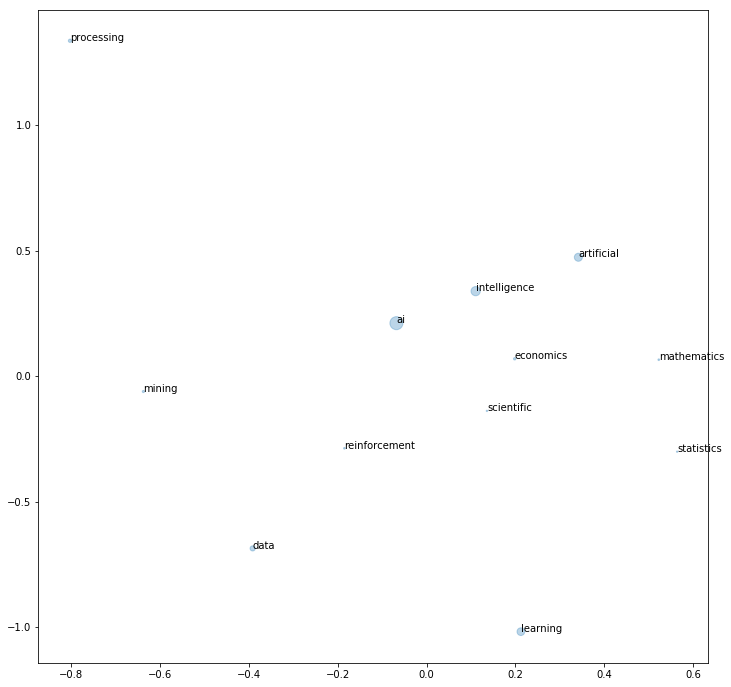

In [27]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_embedded = embedding.fit_transform(wordvecs)
fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(X_embedded[:,0], X_embedded[:,1], s=CountTerminosDeInteres, alpha=0.3)

for i, txt in enumerate(TerminosDeInteres):
    ax.annotate(txt, (X_embedded[i,0], X_embedded[i,1]))

In [29]:
#otra aproximación posible
from gensim.models import Word2Vec
model2 = Word2Vec(
        all_words,
        size=10,
        window=6,
        min_count=1,
        workers=10)
model2.train(all_words, total_examples=len(all_words), epochs=10)

(71093, 76120)

In [30]:
model2.wv.most_similar(positive=['intelligence'],topn=6)

[(u'artificial', 0.999434769153595),
 (u'machines', 0.9993200898170471),
 (u'system', 0.9993115663528442),
 (u'ai', 0.9992674589157104),
 (u'computer', 0.9992370009422302),
 (u'researchers', 0.9992085099220276)]

## Skip-gram

In [31]:
#otra aproximación posible
from gensim.models import Word2Vec
model2 = Word2Vec(
        all_words,
        size=10,
        window=6,
        min_count=1,
        sg= 1, #1 for skip-gram; otherwise CBOW
        workers=10)
model2.train(all_words, total_examples=len(all_words), epochs=10)

(71093, 76120)

In [32]:
It almodel2.wv.most_similar(positive=['intelligence'],topn=6)

[(u'machines', 0.9831738471984863),
 (u'beings', 0.978954017162323),
 (u'processing', 0.9764113426208496),
 (u'general', 0.9747872948646545),
 (u'science', 0.9746779203414917),
 (u'could', 0.97337406873703)]

It also have options for hierarchical softmax or negative sampling:


- **hs** ({0, 1}, optional) – If 1, hierarchical softmax will be used for model training. If 0, and negative is non-zero, negative sampling will be used.
- **negative** (int, optional) – If > 0, negative sampling will be used, the int for negative specifies how many “noise words” should be drawn (usually between 5-20). If set to 0, no negative sampling is used.

### There are other two widely used representations based on Matrix factorization:

These methods utilize low-rank approximations to decompose large matrices that
capture statistical information about a corpus. That means that this methods are unsupervised in comparison to skip-gram and CBOW that are supervised.

- **Latent Semantic Analysis**: Based on tf-idf representation http://lsa.colorado.edu/papers/dp1.LSAintro.pdf

- **Global vectos (GoVe)**: Based on the co-occurrence matrix https://nlp.stanford.edu/pubs/glove.pdf

## GloVe

In [5]:
import itertools
from gensim.models.word2vec import Text8Corpus
from glove import Corpus, Glove
#sentences = list(itertools.islice(Text8Corpus('text8'),None))
corpus = Corpus()
corpus.fit(all_words, window=10)
glove = Glove(no_components=2, learning_rate=0.05)
glove.fit(corpus.matrix, epochs=50, no_threads=4, verbose=True)
glove.add_dictionary(corpus.dictionary)
glove.most_similar('intelligence')

Performing 50 training epochs with 4 threads
Epoch 0
Epoch 1
Epoch 2
Epoch 3
Epoch 4
Epoch 5
Epoch 6
Epoch 7
Epoch 8
Epoch 9
Epoch 10
Epoch 11
Epoch 12
Epoch 13
Epoch 14
Epoch 15
Epoch 16
Epoch 17
Epoch 18
Epoch 19
Epoch 20
Epoch 21
Epoch 22
Epoch 23
Epoch 24
Epoch 25
Epoch 26
Epoch 27
Epoch 28
Epoch 29
Epoch 30
Epoch 31
Epoch 32
Epoch 33
Epoch 34
Epoch 35
Epoch 36
Epoch 37
Epoch 38
Epoch 39
Epoch 40
Epoch 41
Epoch 42
Epoch 43
Epoch 44
Epoch 45
Epoch 46
Epoch 47
Epoch 48
Epoch 49


[(u'expensive', 0.9999943256553985),
 (u'carl', 0.9999932942641124),
 (u'economists', 0.9999797448176789),
 (u'many', 0.9999756264879281)]

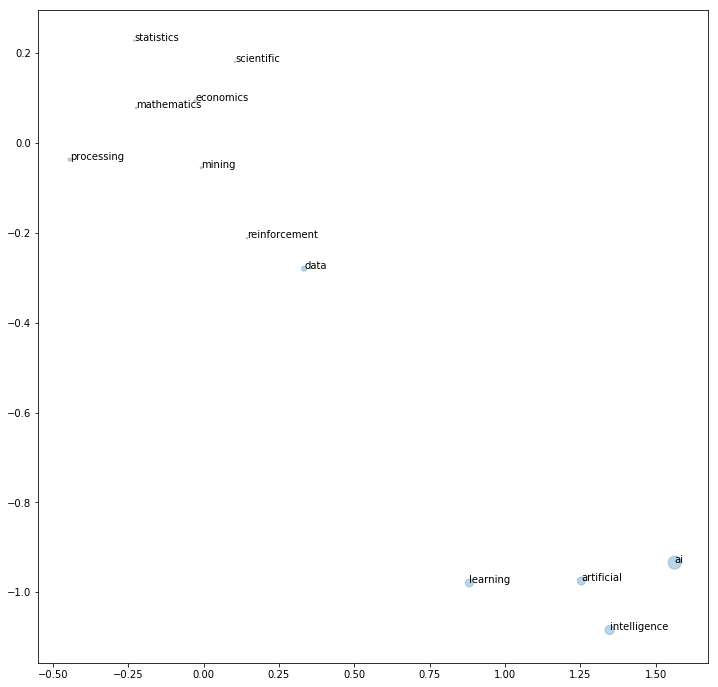

In [11]:
Nterm = len(TerminosDeInteres)
indice = np.zeros(Nterm, dtype=int)
for i in range(Nterm):
    indice[i] = corpus.dictionary.get(TerminosDeInteres[i])
wordembedding = glove.word_vectors[indice,:]

fig, ax = plt.subplots(figsize=(12,12))
ax.scatter(wordembedding[:,0], wordembedding[:,1], s=CountTerminosDeInteres, alpha=0.3)

for i, txt in enumerate(TerminosDeInteres):
    ax.annotate(txt, (wordembedding[i,0], wordembedding[i,1]))

## Latent semantic analisys

In [12]:
from gensim import corpora
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix

In [13]:
dictionary,doc_term_matrix = prepare_corpus(all_words)

In [14]:
#from gensim.test.utils import common_dictionary, common_corpus
from gensim.models import LsiModel
num_topics = 20
model = LsiModel(doc_term_matrix, id2word=dictionary, num_topics = num_topics)
#vectorized_corpus = model[common_corpus]  # vectorize input copus in BoW format

This technique is able to find similarities between word, sentences, or documents.

In [15]:
num_topics = 20
indices = dictionary.doc2idx(TerminosDeInteres)
vec_bow1 = []
for i in range(len(TerminosDeInteres)):
    vec_bow1.append(dictionary.doc2bow([TerminosDeInteres[i]]))
wordembedding=model[vec_bow1]
wordvecs = np.zeros((len(TerminosDeInteres),num_topics))
for i in range(len(TerminosDeInteres)):
    wordvecs[i,:] = np.asarray(wordembedding[i])[:,1].transpose()

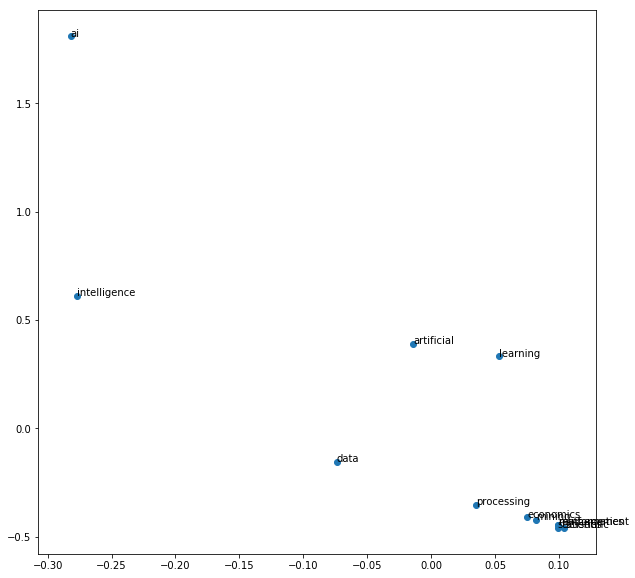

In [16]:
from sklearn.manifold import MDS
embedding = MDS(n_components=2)
X_embedded = embedding.fit_transform(wordvecs)
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(X_embedded[:,0], X_embedded[:,1])

for i, txt in enumerate(TerminosDeInteres):
    ax.annotate(txt, (X_embedded[i,0], X_embedded[i,1]))

## Keras Embedding

In [6]:
from keras.models import Sequential
from keras.layers import Embedding
model = Sequential()
model.add(Embedding(input_dim=1000, output_dim = 4, input_length=3))
model.compile(optimizer = 'adam', loss='mse')
print(model.predict(np.array([[4,8,3]])))

Instructions for updating:
Colocations handled automatically by placer.
[[[ 0.02243595 -0.0379532  -0.01365095  0.02538452]
  [ 0.00805538 -0.02397149 -0.00434388 -0.03309058]
  [ 0.01975426 -0.01678277  0.03988932 -0.03444374]]]


The embedding weights can be replaced by pretrained word2vec weights and used into the the network:

In [11]:
from keras.models import Model
from keras.layers import Input
inputs = Input(shape=(3,))
e = Embedding(input_dim=100, output_dim = 4, weights = [np.random.normal(0,1,size=(100,4))],trainable = False)(inputs)
model = Model(inputs=inputs,outputs=e)
model.compile(optimizer = 'adam', loss='mse')
print(model.predict(np.array([[4,8,3]])))

[[[ 0.15914138 -1.8353431  -0.36946926 -0.35720432]
  [-1.8984413  -0.08630996  0.9512541  -1.8222396 ]
  [ 0.9729543  -0.6496893  -0.70948315 -1.4426557 ]]]


In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3)                 0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 3, 4)              400       
Total params: 400
Trainable params: 0
Non-trainable params: 400
_________________________________________________________________
